In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import numpy as np
import pylab as plt
from pandas import ExcelFile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

In [2]:
# Purpose: Analyze input Pandas Dataframe and return stats per column
# Details: Function calculates levels for categorical variables and allows to analyze summarized information
    
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [ ]:
df = pd.read_csv("/Users/HelpDesk/Datasets/Tickets2023.csv")

In [4]:
df.shape

(5639, 12)

In [5]:
df.head()

,Unnamed: 0,Subject,Category (Ticket),Priority (Ticket),Ticket Owner,Status (Ticket),Created Time (Ticket),Modified Time (Ticket),Created By (Ticket),Resolution Time in Business Hours,Ticket Description,Total Response Time in Business Hours
0,0,Drop off for IT,Hardware,Low,Jason Tom,Completed,01 Jan 2023 15:57,17 Jan 2023 09:32,Alan Lee,2w 1d,NaN,-
1,1,Zoom Link for Pete,Meetings/Zoom,Executive,Eric Willson,Closed,02 Jan 2023 09:16,19 Sep 2023 08:24,Alan Lee,23:35:00,NaN,23:21:00
2,2,Laptop pick up,Hardware,Medium,Jason Tom,Completed,02 Jan 2023 10:56,03 Jan 2023 16:53,Alan Lee,1d 5h,NaN,22:49:00
3,3,UPS Update: Package Scheduled for Delivery Tom...,-,-,Unassigned,Completed,02 Jan 2023 11:15,03 Jan 2023 08:37,Alan Lee,21:22:00,NaN,-
4,4,VPN is still not taking my Password,-,-,Rene Lim,Completed,02 Jan 2023 11:23,04 Jan 2023 17:44,Alan Lee,2d 6h,NaN,03:24:00


In [6]:
pd.options.display.max_colwidth = 100
desc_df = describe_more(df)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,Unnamed: 0,2001,int64,1,4,"{0: 3, 1088: 3, 1098: 3, 1097: 3, 1096: 3, 1095: 3, 1094: 3, 1093: 3, 1092: 3, 1091: 3, 1090: 3,..."
1,Subject,4834,object,1,230,"{'Urgent iOS Security Update': 54, 'Update Laptop Security Software': 26, 'Old Phone Return': 26..."
2,Category (Ticket),12,object,1,15,"{'-': 1674, 'Software': 1255, 'Hardware': 1105, 'Access': 810, 'Meetings/Zoom': 315, 'Security':..."
3,Priority (Ticket),6,object,1,9,"{'Low': 2342, '-': 1545, 'Medium': 875, 'High': 591, 'Executive': 282, '-None-': 1}"
4,Ticket Owner,11,object,3,14,"{'Jason Tom': 954, 'Ken King': 851, 'Steven Squier': 827, 'Eric Willson': 725, 'Rene Lim': 680, ..."
5,Status (Ticket),7,object,3,22,"{'Closed': 2720, 'Completed': 2682, 'Open': 199, 'Assigned - On Hold': 20, 'Assigned - In Progre..."
6,Created Time (Ticket),5484,object,3,17,"{'07 Feb 2023 11:20': 3, '03 Jan 2023 09:42': 3, '15 Feb 2023 13:01': 3, '03 Jan 2023 09:29': 3,..."
7,Modified Time (Ticket),4542,object,3,17,"{'19 Sep 2023 08:24': 247, '05 May 2023 13:19': 21, '11 Dec 2023 13:50': 16, '06 Jun 2023 11:20'..."
8,Created By (Ticket),9,object,3,13,"{'Alan Lee': 4955, 'Phillip Davis': 181, 'Eric Willson': 157, 'Steven Squier': 114, 'Ken King': ..."
9,Resolution Time in Business Hours,925,object,1,8,"{'-': 207, '1w 0d': 117, '1mos 0w': 90, '1w 1d': 83, '00:01:00': 63, '1d 0h': 57, '1w 2d': 56, '..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5639 entries, 0 to 5638
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Unnamed: 0                             5639 non-null   int64 
 1   Subject                                5639 non-null   object
 2   Category (Ticket)                      5636 non-null   object
 3   Priority (Ticket)                      5636 non-null   object
 4   Ticket Owner                           5636 non-null   object
 5   Status (Ticket)                        5636 non-null   object
 6   Created Time (Ticket)                  5636 non-null   object
 7   Modified Time (Ticket)                 5636 non-null   object
 8   Created By (Ticket)                    5636 non-null   object
 9   Resolution Time in Business Hours      5636 non-null   object
 10  Ticket Description                     83 non-null     object
 11  Total Response Ti

### Data Cleaning

In [8]:
# Rename columns
df.rename(columns={'Status (Ticket)': 'Status', 'Priority (Ticket)':'Priority', 'Category (Ticket)':'Category',
    'Created Time (Ticket)':'Created Time', 'Modified Time (Ticket)':'Modified Time', 'Created By (Ticket)':'Created By',
        'Resolution Time in Business Hours':'Total Resolution Hours', 'Total Response Time in Business Hours':'Total Response Hours'}, inplace=True)

In [9]:
# Drop unused columns
df.drop(['Unnamed: 0', 'Ticket Description'], axis = 1, inplace=True)

In [10]:
df.isna().sum()

Subject                   0
Category                  3
Priority                  3
Ticket Owner              3
Status                    3
Created Time              3
Modified Time             3
Created By                3
Total Resolution Hours    3
Total Response Hours      3
dtype: int64

In [11]:
# Drop null values
df.dropna(inplace=True)

### Data Preparation

In [12]:
# Convert Datetime into Hour

def unformatted_time_to_seconds(time_str):
    def hhmmss_to_seconds(time_str):
        if ':' not in time_str:
            return 0
        hh, mm , ss = map(int, time_str.split(':')) 
        return ss + 60*(mm + 60*hh)

    def time_abbreviation_to_seconds(time_str):
        total_seconds = 0        
        if len(time_str) < 2:
            return total_seconds

        import re
        seconds_per_unit = {"s": 1, "sec": 1,
                            "m": 60, "mins": 60,
                            "h": 3600, "hrs": 3600,
                            "d": 86400, "ds": 86400, "days": 86400,
                            "w": 604800, "wk": 604800, "wks": 604800, 
                            "mo": 2629744, "mos": 2629744,
                            "y": 31556926, "yr": 31556926, "yrs": 31556926}
        time_str = time_str.lower()

        parsed_time = re.findall(r'\d+', time_str)
        parsed_time_units = re.findall(r'[a-z]+', time_str)
        if len(parsed_time) != len(parsed_time_units):
            raise Exception("Can't calculate due to invalid input time: " + time_str)
        for i in range(len(parsed_time)):
            total_seconds += int(parsed_time[i]) * seconds_per_unit[parsed_time_units[i]]  
        return total_seconds

    total_seconds = hhmmss_to_seconds(time_str)
    if total_seconds == 0:
        total_seconds = time_abbreviation_to_seconds(time_str)
    return total_seconds

from enum import Enum
TimeUnit = Enum('TimeUnit', ['SECOND', 'MINUTE', 'HOUR', 'DAY'])

def convert_seconds_to(desired_unit, seconds):
    if desired_unit == TimeUnit.SECOND.name:
        return seconds
    elif desired_unit == TimeUnit.MINUTE.name:
        return seconds/60
    elif desired_unit == TimeUnit.HOUR.name:
        return seconds/3600
    elif desired_unit == TimeUnit.DAY.name:
        return seconds/86400
    else:
        raise Exception("Unsupported time unit: " + desired_unit)
        
for i in range(len(df['Total Resolution Hours'])):
    df_cell = df['Total Resolution Hours'].iloc[i]
    desired_time_unit = TimeUnit.HOUR.name
    converted_time = 0
    if type(df_cell) is str:
        converted_time = convert_seconds_to(desired_time_unit, unformatted_time_to_seconds(df_cell))
    elif type(df_cell) is int:
        converted_time = convert_seconds_to(desired_time_unit, df_cell)
    else:
        raise Exception("Invalid time: " + df_cell)
    df['Total Resolution Hours'].iloc[i] = round(converted_time, 2)

for i in range(len(df['Total Response Hours'])):
    df_cell = df['Total Response Hours'].iloc[i]
    desired_time_unit = TimeUnit.HOUR.name
    converted_time = 0
    if type(df_cell) is str:
        converted_time = convert_seconds_to(desired_time_unit, unformatted_time_to_seconds(df_cell))
    elif type(df_cell) is int:
        converted_time = convert_seconds_to(desired_time_unit, df_cell)
    else:
        raise Exception("Invalid time: " + df_cell)
    df['Total Response Hours'].iloc[i] = round(converted_time, 2)

df['Total Resolution Hours'] = list(df['Total Resolution Hours'])
df['Total Response Hours'] = list(df['Total Response Hours'])

In [13]:
df.head()

,Subject,Category,Priority,Ticket Owner,Status,Created Time,Modified Time,Created By,Total Resolution Hours,Total Response Hours
0,Drop off for IT,Hardware,Low,Jason Tom,Completed,01 Jan 2023 15:57,17 Jan 2023 09:32,Alan Lee,360.00,0.00
1,Zoom Link for Pete,Meetings/Zoom,Executive,Eric Willson,Closed,02 Jan 2023 09:16,19 Sep 2023 08:24,Alan Lee,23.58,23.35
2,Laptop pick up,Hardware,Medium,Jason Tom,Completed,02 Jan 2023 10:56,03 Jan 2023 16:53,Alan Lee,29.00,22.82
3,UPS Update: Package Scheduled for Delivery Tomorrow,-,-,Unassigned,Completed,02 Jan 2023 11:15,03 Jan 2023 08:37,Alan Lee,21.37,0.00
4,VPN is still not taking my Password,-,-,Rene Lim,Completed,02 Jan 2023 11:23,04 Jan 2023 17:44,Alan Lee,54.00,3.40


In [14]:
#  Replace missing values
values_to_replace = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col].dtype):
        values_to_replace[col] = 0
    else:
        values_to_replace[col] = 'Missing'

df = df.replace(to_replace=r'-', value=values_to_replace, regex=True)

There're outliers in our dataset. 

We have to remove those outliers before doing further analysis.

In [15]:
df.describe()

,Total Resolution Hours,Total Response Hours
count,5636.000000,5636.000000
mean,127.842331,25.021487
std,350.404188,106.349237
min,0.000000,0.000000
25%,0.900000,0.030000
50%,8.025000,0.520000
75%,96.000000,4.085000
max,6347.880000,2695.450000


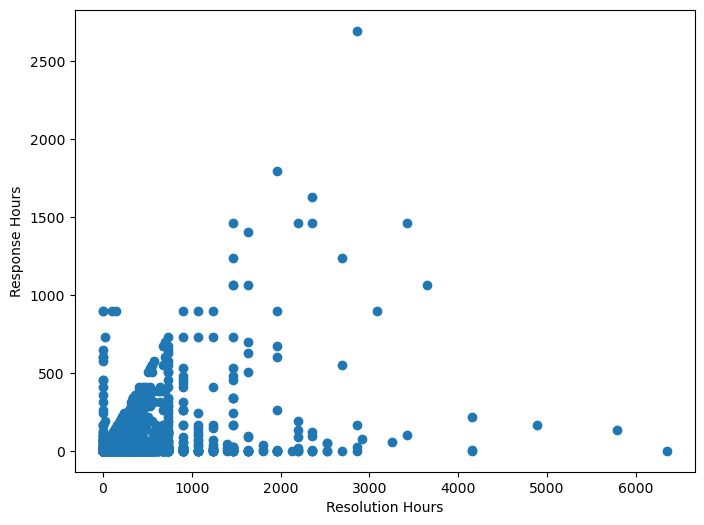

In [16]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Total Resolution Hours'], df['Total Response Hours'])
ax.set_xlabel('Resolution Hours')
ax.set_ylabel('Response Hours')
plt.show()

In [17]:
# Calculate the z-score for each resolution time
z = np.abs(stats.zscore(df['Total Resolution Hours']))
print(z)
# Identify outliers as resolution time with a z-score greater than 3
threshold = 3
outliers = df[z > threshold]

0       0.662601
1       0.297575
2       0.282106
3       0.303883
4       0.210753
          ...   
5633    0.364532
5634    0.361450
5635    0.364875
5636    0.364875
5637    0.364875
Name: Total Resolution Hours, Length: 5636, dtype: float64


In [18]:
# Print the outliers of Resolution Hours
outliers.head()

,Subject,Category,Priority,Ticket Owner,Status,Created Time,Modified Time,Created By,Total Resolution Hours,Total Response Hours
506,Shared File Password Protection Need,Missing,Missing,Gary Pitman,Completed,20 Jan 2023 10:26,12 Jun 2023 10:27,Alan Lee,3425.94,98.00
516,Separation from Service: Chito Quijano 1/12/23,Termination,High,Rene Lim,Closed,20 Jan 2023 12:15,09 Oct 2023 11:34,Steven Squier,6347.88,0.00
555,RE: assistance with Meeting Room booking calendar,Missing,Missing,Gary Pitman,Completed,23 Jan 2023 16:06,12 Jun 2023 10:27,Alan Lee,3257.94,53.00
566,Old Phone Return,Hardware,Low,Phillip Davis,Completed,24 Jan 2023 10:11,20 Apr 2023 13:33,Phillip Davis,1964.97,1796.97
588,FW: OHIP interns summer 2023,Missing,High,Rene Lim,Completed,24 Jan 2023 13:50,15 May 2023 12:17,Alan Lee,2527.45,0.00


In [19]:
# Drop rows containing outliers
df = df.drop(outliers.index)
# Review proccessed dataframe
df.head()

,Subject,Category,Priority,Ticket Owner,Status,Created Time,Modified Time,Created By,Total Resolution Hours,Total Response Hours
0,Drop off for IT,Hardware,Low,Jason Tom,Completed,01 Jan 2023 15:57,17 Jan 2023 09:32,Alan Lee,360.00,0.00
1,Zoom Link for Pete,Meetings/Zoom,Executive,Eric Willson,Closed,02 Jan 2023 09:16,19 Sep 2023 08:24,Alan Lee,23.58,23.35
2,Laptop pick up,Hardware,Medium,Jason Tom,Completed,02 Jan 2023 10:56,03 Jan 2023 16:53,Alan Lee,29.00,22.82
3,UPS Update: Package Scheduled for Delivery Tomorrow,Missing,Missing,Unassigned,Completed,02 Jan 2023 11:15,03 Jan 2023 08:37,Alan Lee,21.37,0.00
4,VPN is still not taking my Password,Missing,Missing,Rene Lim,Completed,02 Jan 2023 11:23,04 Jan 2023 17:44,Alan Lee,54.00,3.40


In [20]:
# Stats after removing outliers
df.describe().round(2)

,Total Resolution Hours,Total Response Hours
count,5517.00,5517.00
mean,87.59,19.36
std,177.08,69.31
min,0.00,0.00
25%,0.87,0.03
50%,6.52,0.50
75%,91.00,3.67
max,1066.48,898.48


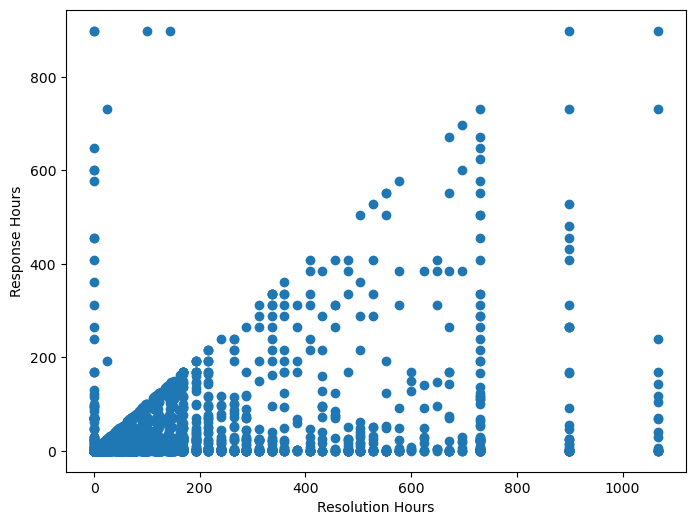

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Total Resolution Hours'], df['Total Response Hours'])
ax.set_xlabel('Resolution Hours')
ax.set_ylabel('Response Hours')
plt.show()

### Categorical Variables Analysis

In [22]:
# Unique values
print("Unique values:", df['Ticket Owner'].unique())
# Value counts
ticket_owner = pd.DataFrame(df['Ticket Owner'].value_counts())
ticket_owner

Unique values: ['Jason Tom' 'Eric Willson' 'Unassigned' 'Rene Lim' 'Ken King'
 'Steven Squier' 'Phillip Davis' 'Gary Pitman' 'Alan Lee' 'Max Franz'
 'Larry Jennings']


,count
Ticket Owner,
Jason Tom,946
Ken King,840
Steven Squier,820
Eric Willson,722
Rene Lim,653
Max Franz,585
Phillip Davis,565
Unassigned,243
Gary Pitman,127


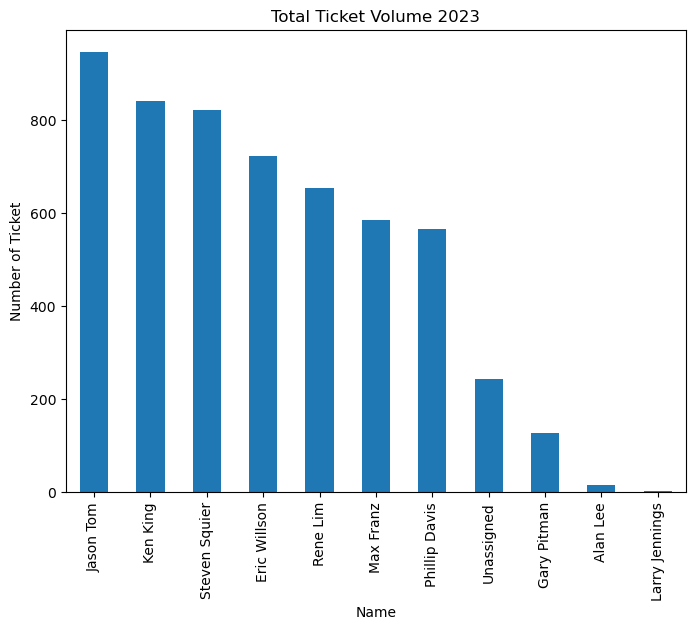

In [23]:
ticket_owner.plot.bar(figsize=(8, 6), subplots=True)
plt.title('Total Ticket Volume 2023')
plt.xlabel('Name')
plt.ylabel('Number of Ticket')
plt.legend('', frameon=False)
plt.show()

In [24]:
# Unique values
print("Unique values:", df['Created By'].unique())
# Value counts
created_by = pd.DataFrame(df['Created By'].value_counts())
created_by

Unique values: ['Alan Lee' 'Eric Willson' 'Steven Squier' 'Jason Tom' 'Phillip Davis'
 'Ken King' 'Gary Pitman' 'Rene Lim' 'Max Franz']


,count
Created By,
Alan Lee,4869
Phillip Davis,167
Eric Willson,154
Steven Squier,106
Ken King,85
Jason Tom,59
Rene Lim,38
Max Franz,31
Gary Pitman,8


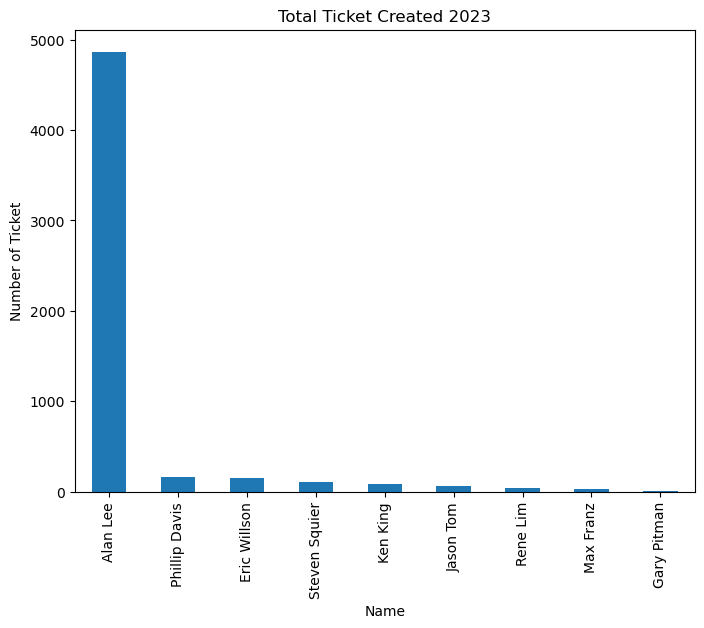

In [25]:
created_by.plot.bar(figsize=(8, 6), subplots=True)
plt.title('Total Ticket Created 2023')
plt.xlabel('Name')
plt.ylabel('Number of Ticket')
plt.legend('', frameon=False)
plt.show()

In [26]:
# Unique values
print("Unique values:", df['Status'].unique())
# Value counts
status = print(df['Status'].value_counts())

Unique values: ['Completed' 'Closed' 'Open' 'Assigned Missing In Progress' 'Cancelled'
 'Assigned Missing On Hold' 'Assigned to Team']
Status
Completed                       2659
Closed                          2626
Open                             197
Assigned Missing On Hold          20
Assigned Missing In Progress       7
Cancelled                          5
Assigned to Team                   3
Name: count, dtype: int64


In [27]:
# Unique values
print("Unique values:", df['Priority'].unique())
# Value counts
priority = print(df['Priority'].value_counts().head())

Unique values: ['Low' 'Executive' 'Medium' 'Missing' 'High' 'MissingNoneMissing']
Priority
Low          2318
Missing      1496
Medium        859
High          568
Executive     275
Name: count, dtype: int64


In [28]:
# Unique values
print("Unique values:", df['Category'].unique())
# Value counts
category = print(df['Category'].value_counts())

Unique values: ['Hardware' 'Meetings/Zoom' 'Missing' 'Access' 'Training' 'Software'
 'Termination' 'Security' 'Purchase Orders' 'New Hire' 'LMM' 'Email']
Category
Missing            1618
Software           1245
Hardware           1086
Access              807
Meetings/Zoom       315
Security            256
New Hire             52
Purchase Orders      43
Email                30
Termination          28
LMM                  27
Training             10
Name: count, dtype: int64


In [29]:
# Unique values
print("Unique values:", df['Subject'].unique())
# Value counts
subject = print(df['Subject'].value_counts())

Unique values: ['Drop off for IT' 'Zoom Link for Pete' 'Laptop pick up ' ...
 'FW: Traveling ' 'RE: Blocked Email Missing Bob Kuks'
 'FW: Oakland building Access']
Subject
Urgent iOS Security Update                                           54
Update Laptop Security Software                                      26
Old Phone Return                                                     24
Amazon                                                               19
Adobe XI Pro Update                                                  18
                                                                     ..
Spam FW: Question About California Nurses Association​’s Benefits     1
Adding a Zoom Meeting to an existing series. . .                      1
icloud Password                                                       1
"Update Apple ID Settings"                                            1
FW: Oakland building Access                                           1
Name: count, Length: 4731, dtype: in

### Numerical Variable Analysis

In [30]:
df.head()

,Subject,Category,Priority,Ticket Owner,Status,Created Time,Modified Time,Created By,Total Resolution Hours,Total Response Hours
0,Drop off for IT,Hardware,Low,Jason Tom,Completed,01 Jan 2023 15:57,17 Jan 2023 09:32,Alan Lee,360.00,0.00
1,Zoom Link for Pete,Meetings/Zoom,Executive,Eric Willson,Closed,02 Jan 2023 09:16,19 Sep 2023 08:24,Alan Lee,23.58,23.35
2,Laptop pick up,Hardware,Medium,Jason Tom,Completed,02 Jan 2023 10:56,03 Jan 2023 16:53,Alan Lee,29.00,22.82
3,UPS Update: Package Scheduled for Delivery Tomorrow,Missing,Missing,Unassigned,Completed,02 Jan 2023 11:15,03 Jan 2023 08:37,Alan Lee,21.37,0.00
4,VPN is still not taking my Password,Missing,Missing,Rene Lim,Completed,02 Jan 2023 11:23,04 Jan 2023 17:44,Alan Lee,54.00,3.40


In [31]:
owner_resolution = df.groupby('Ticket Owner')[['Total Resolution Hours']].mean().round(2).sort_values(by=['Total Resolution Hours']
                                                                                , ascending=False)
owner_resolution

,Total Resolution Hours
Ticket Owner,
Larry Jennings,192.00
Phillip Davis,152.84
Gary Pitman,137.99
Rene Lim,109.57
Jason Tom,96.20
Unassigned,92.15
Max Franz,77.59
Steven Squier,70.22
Ken King,68.81


In [32]:
owner_response = df.groupby('Ticket Owner')[['Total Response Hours']].mean().round(2).sort_values(by=['Total Response Hours']
                                                                                , ascending=False)
owner_response

,Total Response Hours
Ticket Owner,
Ken King,22.34
Gary Pitman,22.24
Max Franz,21.97
Unassigned,21.33
Rene Lim,21.23
Phillip Davis,19.93
Eric Willson,18.41
Steven Squier,17.50
Jason Tom,15.25


### Time Series Analysis

In [33]:
df["Created Time"] = pd.to_datetime(df["Created Time"])

In [34]:
print(df["Created Time"].min(), df["Created Time"].max())
print(df["Created Time"].max() - df["Created Time"].min())

2023-01-01 15:57:00 2023-12-11 16:50:00
344 days 00:53:00


In [35]:
created_tickets = df['Created Time'].dt.date.value_counts()
created_tickets

Created Time
2023-04-13    79
2023-01-03    72
2023-01-09    48
2023-11-14    45
2023-02-21    44
              ..
2023-03-19     1
2023-03-18     1
2023-11-11     1
2023-11-12     1
2023-01-01     1
Name: count, Length: 300, dtype: int64

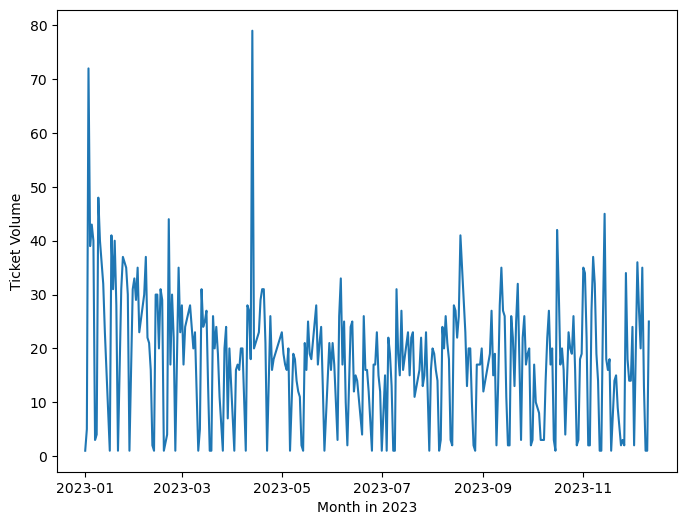

In [36]:
created_tickets.plot.line(figsize=(8, 6), subplots=True)
plt.xlabel('Month in 2023')
plt.ylabel('Ticket Volume')
plt.legend('', frameon=False)
plt.show()

In [37]:
df['Day Of Week'] = pd.to_datetime(df['Created Time']).dt.day_name()
df.head()

,Subject,Category,Priority,Ticket Owner,Status,Created Time,Modified Time,Created By,Total Resolution Hours,Total Response Hours,Day Of Week
0,Drop off for IT,Hardware,Low,Jason Tom,Completed,2023-01-01 15:57:00,17 Jan 2023 09:32,Alan Lee,360.00,0.00,Sunday
1,Zoom Link for Pete,Meetings/Zoom,Executive,Eric Willson,Closed,2023-01-02 09:16:00,19 Sep 2023 08:24,Alan Lee,23.58,23.35,Monday
2,Laptop pick up,Hardware,Medium,Jason Tom,Completed,2023-01-02 10:56:00,03 Jan 2023 16:53,Alan Lee,29.00,22.82,Monday
3,UPS Update: Package Scheduled for Delivery Tomorrow,Missing,Missing,Unassigned,Completed,2023-01-02 11:15:00,03 Jan 2023 08:37,Alan Lee,21.37,0.00,Monday
4,VPN is still not taking my Password,Missing,Missing,Rene Lim,Completed,2023-01-02 11:23:00,04 Jan 2023 17:44,Alan Lee,54.00,3.40,Monday


In [38]:
dow_tickets = df['Day Of Week'].value_counts().sort_values(ascending=False)
dow_tickets

Day Of Week
Tuesday      1230
Thursday     1146
Monday       1120
Wednesday    1038
Friday        867
Sunday         62
Saturday       54
Name: count, dtype: int64

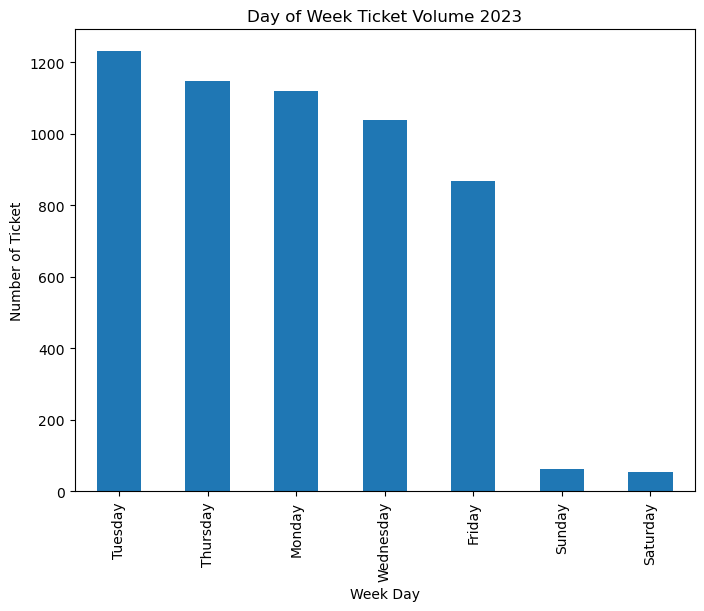

In [39]:
dow_tickets.plot.bar(figsize=(8, 6), subplots=True)
plt.title('Day of Week Ticket Volume 2023')
plt.xlabel('Week Day')
plt.ylabel('Number of Ticket')
plt.legend('', frameon=False)
plt.show()

In [40]:
dow_resolution = df.groupby([df["Created Time"].dt.day_name(), 
                    "Ticket Owner"])[["Total Resolution Hours", "Total Response Hours"]].mean().round(2)
dow_resolution

Total Resolution Hours  Total Response Hours
Created Time Ticket Owner                                               
Friday       Alan Lee                         0.00                  0.00
             Eric Willson                    61.62                 20.84
             Gary Pitman                    127.82                 18.86
             Jason Tom                      119.30                 20.65
             Ken King                       104.93                 40.83
...                                            ...                   ...
Wednesday    Max Franz                       73.95                 18.68
             Phillip Davis                  142.39                 30.49
             Rene Lim                       137.87                 22.32
             Steven Squier                   78.86                 19.84
             Unassigned                      92.77                 29.95

[68 rows x 2 columns]

In [41]:
dow_staff = df.groupby([df["Created Time"].dt.day_name(), 
                    "Ticket Owner"])["Day Of Week"].value_counts().round(2)
dow_staff

Created Time  Ticket Owner   Day Of Week
Friday        Alan Lee       Friday           1
              Eric Willson   Friday         132
              Gary Pitman    Friday          24
              Jason Tom      Friday         131
              Ken King       Friday         126
                                           ... 
Wednesday     Max Franz      Wednesday      108
              Phillip Davis  Wednesday       99
              Rene Lim       Wednesday      140
              Steven Squier  Wednesday      159
              Unassigned     Wednesday       43
Name: count, Length: 68, dtype: int64

#### Subject - Keywords Analysis

In [42]:
from collections import Counter
import string
from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

In [43]:
# Duplicate Dataframe
df1 = df

In [44]:
df1['Subject Keywords'] = df1['Subject'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
df1.head()

,Subject,Category,Priority,Ticket Owner,Status,Created Time,Modified Time,Created By,Total Resolution Hours,Total Response Hours,Day Of Week,Subject Keywords
0,Drop off for IT,Hardware,Low,Jason Tom,Completed,2023-01-01 15:57:00,17 Jan 2023 09:32,Alan Lee,360.00,0.00,Sunday,Drop IT
1,Zoom Link for Pete,Meetings/Zoom,Executive,Eric Willson,Closed,2023-01-02 09:16:00,19 Sep 2023 08:24,Alan Lee,23.58,23.35,Monday,Zoom Link Pete
2,Laptop pick up,Hardware,Medium,Jason Tom,Completed,2023-01-02 10:56:00,03 Jan 2023 16:53,Alan Lee,29.00,22.82,Monday,Laptop pick
3,UPS Update: Package Scheduled for Delivery Tomorrow,Missing,Missing,Unassigned,Completed,2023-01-02 11:15:00,03 Jan 2023 08:37,Alan Lee,21.37,0.00,Monday,UPS Update: Package Scheduled Delivery Tomorrow
4,VPN is still not taking my Password,Missing,Missing,Rene Lim,Completed,2023-01-02 11:23:00,04 Jan 2023 17:44,Alan Lee,54.00,3.40,Monday,VPN taking Password


In [45]:
keywords = Counter(" ".join(df1['Subject Keywords']).split()).most_common(20)
keywords

[('FW:', 845),
 ('Missing', 536),
 ('Phone', 424),
 ('Email', 334),
 ('Access', 300),
 ('Update', 299),
 ('Printer', 294),
 ('Issue', 274),
 ('Office', 270),
 ('Zoom', 269),
 ('Laptop', 266),
 ('Need', 233),
 ('New', 227),
 ('RE:', 211),
 ('Help', 193),
 ('Security', 163),
 ('Badge', 150),
 ('Meeting', 127),
 ('Room', 120),
 ('Working', 119)]